In [ ]:
def plotvaisalalonlat (datestrings, timestrings, lats, lons, magnitudes, tbeg, tend, filtag, latbeg, latend, lonbeg, lonend):
    from mpl_toolkits.basemap import Basemap
    import matplotlib.pyplot as plt
    import numpy as np
    print ("plotting data")
    npoints=93
    import pytz
    utc_dt = datestrings[0].astimezone (pytz.utc)
    firstflashtimestr=utc_dt.isoformat()
    #mydate=getantimeridiancrossingtime2(firstflashtimestr)
    #utc_dt2 = mydate.astimezone (pytz.utc)

    mydatestr=utc_dt.isoformat()
    
    #lonarr, latarr=getorbit(mydatestr, npoints)
    #lonarr, latarr, timearr= getorbitinrange(tbeg,tend, npoints)

    print ("Creating plot of ground lightning data ... please wait")
    fig=plt.figure( figsize=(15, 6))
    ax = fig.add_axes([0.1,0.1,0.8,0.8])

    #minlat= (min (lats))
    #maxlat= (max (lats))
    #minlon= (min (lons))
    #maxlon= (max (lons))
    
    
    minlat= latbeg
    maxlat= latend
    minlon= lonbeg
    maxlon= lonend
    
    minmag=(min (magnitudes))
    maxmag=(max (magnitudes))     
    # --- Build Map ---


    map =  Basemap(projection='merc',llcrnrlat=minlat,urcrnrlat=maxlat,\
                llcrnrlon=minlon,urcrnrlon=maxlon,lat_ts=20,resolution='f')
    map.drawcoastlines()
    map.drawcountries()
    map.fillcontinents(color = 'gray')
    map.drawmapboundary()
    map.drawmeridians(np.arange(0, 360, 5),labels=[0,0,0,1],fontsize=10)
    map.drawparallels(np.arange(-90, 90, 5),labels=[1,0,0,0],fontsize=10)
    date = datetime.utcnow()
    date=datestrings[0]

    import pytz
    utc_dt = date.astimezone (pytz.utc)
    utc_dt = utc_dt.replace(tzinfo=None)
    CS=map.nightshade(utc_dt)

    min_marker_size = .09
    for lon, lat, mag in zip(lons, lats, magnitudes):
        x,y = map(lon, lat)
        msize = mag * min_marker_size
        marker_string = get_marker_color(mag)
        map.plot(x, y, marker_string, markersize=msize)

    #These lines plot the ASIM/ISS orbit
    #x, y = map(lonarr, latarr) # forgot this line 
    #map.plot(x, y, 'D-', markersize=10, linewidth=2, color='k', markerfacecolor='b') 
    #plt.title("Vaisala GLD 360 data  from "+ tbeg 
    #          + ' to  '  + tend.strftime('%Y%m%dT%H%M%S') +' ,  nevents=' )
    #tag = datestrings[0].strftime('%Y%m%dT%H%M%S')
    tag='temptag'
    plt.savefig('vaisala'+filtag+tag+'.png')

    plt.show()
    
    
def read_postgres_vaisala_lon_lat (tbeg, tend,lonbeg, lonend,latbeg, latend, limit):
    import psycopg2
    import sys
    import numpy as np

    tbegstr=tbeg.strftime("%Y-%m-%d %H:%M:%S")
    tendstr=tend.strftime("%Y-%m-%d %H:%M:%S")
    limitstr=str(limit)
    lonbegstr=str(lonbeg)
    lonendstr=str(lonend)
    latbegstr=str(latbeg)
    latendstr=str(latend)
    print lonbegstr
    con = None

    try:

        #con = psycopg2.connect(host='asdc.space.dtu.dk', database='gld', user='gmurphy', password='j-l%CHB2Za') 
        con = psycopg2.connect(host='127.0.0.1', database='gld', user='gmurphy', password='') 
        cur = con.cursor()
        cur.execute("SET TIME ZONE 'UTC';")  # UTC 
        cur.execute("SELECT * FROM lightnings LIMIT 0")
        colnames = [desc[0] for desc in cur.description]
        cur.execute("SELECT * FROM lightnings WHERE ltime   BETWEEN '"+tbegstr+"' AND '"+tendstr+"' AND  lon   BETWEEN '"+lonbegstr+"' AND '"+lonendstr+"'   AND  lat   BETWEEN '"+latbegstr+"' AND '"+latendstr+"'    LIMIT '"+limitstr+"' ;")          
        data =   (cur.fetchall())

        #for row in rows:
        #    print (row)

    except :
        print ('Error could not connect to database'     )
        sys.exit(1)


    finally:

        if con:
            con.close()


    from numpy import array
    nparr = array( data )
    print ('returned data: ' ,nparr.shape)
    #id=nparr[:,0]
    datestrings=nparr[:,0]
    timestrings=nparr[:,1].astype(int)
    magnitudes=nparr[:,2].astype(float)
    lats=nparr[:,3].astype(float)
    lons=nparr[:,4].astype(float)
    
    return datestrings, timestrings, lats, lons, magnitudes




def read_postgres_vaisala_lon (tbeg, tend,lonbeg, lonend, limit):
    import psycopg2
    import sys
    import numpy as np

    tbegstr=tbeg.strftime("%Y-%m-%d %H:%M:%S")
    tendstr=tend.strftime("%Y-%m-%d %H:%M:%S")
    limitstr=str(limit)
    lonbegstr=str(lonbeg)
    lonendstr=str(lonend)
    latbegstr=str(latbeg)
    latendstr=str(latend)
    print lonbegstr
    con = None

    try:

        con = psycopg2.connect(host='asdc.space.dtu.dk', database='gld', user='gmurphy', password='j-l%CHB2Za') 
        cur = con.cursor()
        cur.execute("SET TIME ZONE 'UTC';")  # UTC 
        cur.execute("SELECT * FROM lightnings LIMIT 0")
        colnames = [desc[0] for desc in cur.description]
        cur.execute("SELECT * FROM lightnings WHERE ltime   BETWEEN '"+tbegstr+"' AND '"+tendstr+"' AND  lon   BETWEEN '"+lonbegstr+"' AND '"+lonendstr+"'   LIMIT '"+limitstr+"' ;")          
        data =   (cur.fetchall())

        #for row in rows:
        #    print (row)

    except :
        print ('Error could not connect to database'     )
        sys.exit(1)


    finally:

        if con:
            con.close()


    from numpy import array
    nparr = array( data )
    print ('npar.shape' ,nparr.shape)
    #id=nparr[:,0]
    datestrings=nparr[:,0]
    timestrings=nparr[:,1].astype(int)
    magnitudes=nparr[:,2].astype(float)
    lats=nparr[:,3].astype(float)
    lons=nparr[:,4].astype(float)
    
    return datestrings, timestrings, lats, lons, magnitudes



def read_postgres_vaisala (tbeg, tend, limit):
    import psycopg2
    import sys
    import numpy as np

    tbegstr=tbeg.strftime("%Y-%m-%d %H:%M:%S")
    tendstr=tend.strftime("%Y-%m-%d %H:%M:%S")
    limitstr=str(limit)

    con = None

    try:

        con = psycopg2.connect(host='asdc.space.dtu.dk', database='gld', user='gmurphy', password='j-l%CHB2Za') 
        cur = con.cursor()
        cur.execute("SET TIME ZONE 'UTC';")  # UTC 
        cur.execute("SELECT * FROM lightnings LIMIT 0")
        colnames = [desc[0] for desc in cur.description]
        cur.execute("SELECT * FROM lightnings WHERE ltime   BETWEEN '"+tbegstr+"' AND '"+tendstr+"' ORDER BY ltime ASC, ltime_ns  LIMIT '"+limitstr+"' ;")          
        data =   (cur.fetchall())

        #for row in rows:
        #    print (row)

    except :
        print ('Error could not connect to database'     )
        sys.exit(1)


    finally:

        if con:
            con.close()


    from numpy import array
    nparr = array( data )
    print ('npar.shape' ,nparr.shape)
    #id=nparr[:,0]
    datestrings=nparr[:,0]
    timestrings=nparr[:,1].astype(int)
    magnitudes=nparr[:,2].astype(float)
    lats=nparr[:,3].astype(float)
    lons=nparr[:,4].astype(float)
    
    return datestrings, timestrings, lats, lons, magnitudes



def getorbit(mydatestr,npoints):
    npoints=npoints
    lonarr=[0] * npoints
    latarr=[0] * npoints
    from datetime import datetime, timedelta
    import sys, os
    import pytz
    from dateutil.parser import parse
    import ephem
    import math
    mydate=parse(mydatestr)
    timearr=[mydate] * npoints

    
    lines=gettlefromdb(mydate, 1)
    iss = ephem.readtle(lines[0], lines[1], lines[2])

    for i in range(0,npoints):
        one_hour = timedelta(hours=1)
        # http://spaceflight.nasa.gov/realdata/sightings/SSapplications/Post/JavaSSOP/orbit/ISS/SVPOST.html
        
        orbitinminutes=24*60/iss._n
        minint = timedelta(minutes=orbitinminutes/npoints)
        dateinc=mydate +i*minint
        home = ephem.Observer()
        home.date = dateinc
        
        # Always get the latest ISS TLE data from:
        
        iss.compute(home)
        dist=2
        timearr[i]=dateinc
        lonarr[i]=math.degrees(iss.sublong)
        latarr[i]=math.degrees(iss.sublat)
    return (lonarr, latarr, timearr)

def getorbitinrange(mydate,myenddate, npoints):
    npoints=npoints
    lonarr=[0] * npoints
    latarr=[0] * npoints
    from datetime import datetime, timedelta
    import sys, os
    import pytz
    from dateutil.parser import parse
    import ephem
    import math

    
    timearr=[mydate] * npoints

    mydiff= myenddate-mydate
    
    #print 'gm seconds', mydiff.seconds
    
    myinc=timedelta(seconds=mydiff.seconds/npoints)
    
    
    
    lines=gettlefromdb(mydate, 1)
    iss = ephem.readtle(lines[0], lines[1], lines[2])

    
    for i in range(0,npoints):
        dateinc=mydate +i*myinc
        home = ephem.Observer()
        home.date = dateinc
        
        # Always get the latest ISS TLE data from:
        
        iss.compute(home)
        dist=2
        timearr[i]=dateinc
        lonarr[i]=math.degrees(iss.sublong)
        latarr[i]=math.degrees(iss.sublat)
    return (lonarr, latarr, timearr)

def gettlefromdb(tbeg,  limit):
    import psycopg2
    import sys
    import numpy as np
    from datetime import date, datetime, timedelta
    import pytz
    import ephem
    
    #date_object = datetime.strptime(tbeg, '%Y-%m-%d %H:%M:%S')
    date_object = tbeg
    
    t1=date_object-timedelta(minutes=59)
    t2=date_object+timedelta(minutes=59)
    tbegstr=t1.strftime("%Y-%m-%d %H:%M:%S")
    tendstr=t2.strftime("%Y-%m-%d %H:%M:%S")
    #print (tbegstr, tendstr)
    limitstr=str(limit)
    con = None

    try:

        con = psycopg2.connect(host='asdc.space.dtu.dk', database='gld', user='gmurphy', password='j-l%CHB2Za') 
        cur = con.cursor()
        cur.execute("SET TIME ZONE 'UTC';")  # UTC 
        #colnames = [desc[0] for desc in cur.description]
        cur.execute("SELECT * FROM isstle WHERE logtime   BETWEEN '"+tbegstr+"' AND '"+tendstr+"'   LIMIT '"+limitstr+"' ;")          
        data =   (cur.fetchall())

        #for row in rows:
        #    print (row)

    except :
        print ('Error could not connect to database'     )
        sys.exit(1)


    finally:

        if con:
            con.close()


    from numpy import array
    nparr = array( data )
    #print (data)
    #print ('npar.shape' ,nparr.shape)
    #id=nparr[:,0]

    line0=nparr[0,16]
    line1=nparr[0,17]
    line2=nparr[0,18]
    lines=[line0, line1, line2]
    #print (lines)
    return (lines)


def AddISSPositionToDB(isspos):

    import psycopg2
    import sys
    import numpy as np


    con = None

    try:

        
        con = psycopg2.connect(host='asdc.space.dtu.dk', database='gld', user='gmurphy', password='j-l%CHB2Za') 
        cur = con.cursor()
        #cur.execute("SELECT * FROM isstle LIMIT 0")
        cur.execute("SET TIME ZONE 'UTC';")  # UTC 
        SQL = "INSERT INTO isspos (ltime,lat, lon) VALUES (%s,  %s, %s );" # Note: no quotes
        data = ( isspos['ltime']    ,isspos['lat']   ,isspos['lon']  )
        cur.execute(SQL, data) # Note: no % operator
        cols = isspos.keys()
        vals = [isspos[x] for x in cols]
        vals_str_list = ["%s"] * len(vals)
        vals_str = ", ".join(vals_str_list)
        con.commit()
        print ('Successfully committed to database' )

    except :
        print ('Error could not connect to database' )

    finally:

        if con:
            con.close()  
    import pprint
    pp = pprint.PrettyPrinter(indent=4)
    pp.pprint(isspos)
    

    
def getantimeridiancrossingtime2(timestr):
    import math
    import time
    from datetime import datetime, timedelta
    import ephem
    import numpy as np
    import sys, os
    import pytz
    from dateutil.parser import parse
    
    mydatenow=parse(timestr)
    home = ephem.Observer()
    home.date=mydatenow
    delta_min=timedelta(minutes=1)
    radtodeg=180/np.pi

    lines=gettlefromdb(mydatenow, 1)

    # http://spaceflight.nasa.gov/realdata/sightings/SSapplications/Post/JavaSSOP/orbit/ISS/SVPOST.html
    iss = ephem.readtle(lines[0], lines[1], lines[2])
    
    angle=+178
    angleold=179
    i=0
    while angle < angleold:        
    #for i in range(0,10):
        i=i+1
        mydatenow=parse(timestr)-delta_min*i
        #print (mydatenow)
        angleold=angle+0.0
        home.date=mydatenow
        timeold=mydatenow+timedelta(minutes=1)
        iss.compute(home)       
        angle=iss.sublong*radtodeg
        
        #print mydatenow, angle, angleold
    print ("antimeridian",angleold)
    return (timeold)




def get_marker_color(magnitude):
    import numpy as np
    if np.abs(magnitude) < 200.0:
        return ('go')
    elif np.abs(magnitude) < 400.0:         
        return ('yo')     
    else:         
        return ('ro') 
    

In [ ]:
# origin
lon=0
lat=0
# 

# Mt Etna.
lon=14
lat=37

# Kifuka, DRC
lon=27
lat=-2



# Mt Etna.
lon=14
lat=37



# Athens 
lon=23
lat=37


# Ankara 
lon=32
lat=39


# Istanbul 
lon=28.9
lat=41



# Copenhagen, DK
lon=12.56
lat=55.67

boxsize=1.0*8.0
halfbox=boxsize/2.0
latbeg=lat-halfbox
latend=lat+halfbox
lonbeg=lon-halfbox
lonend=lon+halfbox



%matplotlib inline

from datetime import datetime, timedelta
import pytz


tbeg = datetime(2016, 8, 21, 11,0 , 0,0, pytz.UTC)+timedelta(hours=0)
tend   = tbeg+timedelta(minutes=15)
limit=1000
datestrings, timestrings, lats, lons, magnitudes=read_postgres_vaisala_lon_lat (tbeg, tend,lonbeg, lonend,latbeg, latend, limit)
print len(magnitudes)
print max(magnitudes)
plotvaisalalonlat (datestrings, timestrings, lats, lons, magnitudes, tbeg, tend, 'test', latbeg, latend, lonbeg, lonend)
print datestrings[0]
print datestrings[-1]


import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt 
import numpy as np
dates = matplotlib.dates.date2num(datestrings)
#plt.plot_date(dates, np.abs(magnitudes), fmt='bo', tz=None, xdate=True,ydate=False)
fig = plt.figure() 
ax = fig.add_subplot(111)
xax = ax.get_xaxis() # get the x-axis
#Configure x-ticks
ax.set_xticks(dates) # Tickmark + label at every plotted point
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y %H:%M')) 
xax.set_major_locator(mdates.HourLocator(byhour=range(0,24,24)))
ax.plot_date(dates, (magnitudes), ls='', marker='o')



#### import matplotlib
import matplotlib.dates as mdates

import matplotlib.pyplot as plt
import numpy as np 

dates = matplotlib.dates.date2num(datestrings)
#plt.plot_date(dates, np.abs(magnitudes), fmt='bo', tz=None, xdate=True,ydate=False)


fig = plt.figure()
ax = fig.add_subplot(111)

xax = ax.get_xaxis() # get the x-axis

# Configure x-ticks
# ax.set_xticks(dates) 

# Tickmark + label at every plotted point
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y %H:%M'))
xax.set_major_locator(mdates.HourLocator(byhour=range(0,24,12)))


ax.plot_date(dates, (magnitudes), ls='', marker='o')


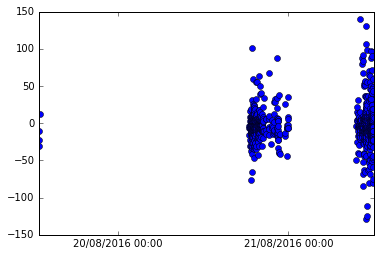

In [65]:
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt 
import numpy as np
dates = matplotlib.dates.date2num(datestrings)
#plt.plot_date(dates, np.abs(magnitudes), fmt='bo', tz=None, xdate=True,ydate=False)
fig = plt.figure() 
ax = fig.add_subplot(111)
xax = ax.get_xaxis() # get the x-axis
#Configure x-ticks
ax.set_xticks(dates) # Tickmark + label at every plotted point
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y %H:%M')) 
xax.set_major_locator(mdates.HourLocator(byhour=range(0,24,24)))
ax.plot_date(dates, (magnitudes), ls='', marker='o')

In [ ]:
from datetime import timedelta, datetime
num=12
npoints=180
for i in range(0,24,2):
    start_date = datetime(2016, 8, 11, 14,0 , 0,0, pytz.UTC)+timedelta(hours=i)
    end_date   = start_date+timedelta(hours=2)
    lon, lat, timearr= getorbitinrange(start_date,end_date, npoints)
    
    for j in range(0,npoints-1):
        isspos={'ltime': timearr[j] ,'lat': lat[j] ,'lon': lon[j]  }
        AddISSPositionToDB(isspos)
    

    

In [ ]:
for i in [0,1,npoints-1]:
    print timearr[i].isoformat(), lon[i], lat[i]

In [ ]:
# get a set of vaisala data between start date and end date
# get iss position and time for the same period
# loop thourgh the vasiala dataset and check the iss-vasiala offsaet less than 4 degrees each time.
# tag the vaisala data accordingly

# if tagging,  call the cloud function as well at this point.



In [ ]:
tbeg = datetime(2016, 8, 9, 12,0 , 0,0, pytz.UTC)+timedelta(hours=0)
tend   = start_date+timedelta(hours=2)  
limit=10
print limit
datestrings, timestrings, lats, lons, magnitudes=read_postgres_vaisala(tbeg, tend, limit)
print (datestrings, timestrings, lats, lons, magnitudes)

In [ ]:
lonbeg=-80
lonend=+80

tbeg = datetime(2016, 8, 9, 12,0 , 0,0, pytz.UTC)+timedelta(hours=0)
tend   = start_date+timedelta(hours=2)
limit=10
datestrings, timestrings, lats, lons, magnitudes=read_postgres_vaisala_lon (tbeg, tend,lonbeg, lonend, limit)
#print (datestrings, timestrings, lats, lons, magnitudes)
print lons

print lats


print datestrings

In [ ]:
print i
print (datestrings, timestrings, lats, lons, magnitudes)

In [4]:
def read_postgres_vaisala_lon_lat (tbeg, tend,lonbeg, lonend,latbeg, latend, limit):
    import psycopg2
    import sys
    import numpy as np

    tbegstr=tbeg.strftime("%Y-%m-%d %H:%M:%S")
    tendstr=tend.strftime("%Y-%m-%d %H:%M:%S")
    limitstr=str(limit)
    lonbegstr=str(lonbeg)
    lonendstr=str(lonend)
    latbegstr=str(latbeg)
    latendstr=str(latend)
    print lonbegstr
    con = None

    try:

        #con = psycopg2.connect(host='asdc.space.dtu.dk', database='gld', user='gmurphy', password='j-l%CHB2Za') 
        con = psycopg2.connect(host='127.0.0.1', database='gld', user='garmu', password='') 
        cur = con.cursor()
        cur.execute("SET TIME ZONE 'UTC';")  # UTC 
        cur.execute("SELECT * FROM lightnings LIMIT 0")
        colnames = [desc[0] for desc in cur.description]
        cur.execute("SELECT * FROM lightnings WHERE ltime   BETWEEN '"+tbegstr+"' AND '"+tendstr+"' AND  lon   BETWEEN '"+lonbegstr+"' AND '"+lonendstr+"'   AND  lat   BETWEEN '"+latbegstr+"' AND '"+latendstr+"'    LIMIT '"+limitstr+"' ;")          
        data =   (cur.fetchall())

        #for row in rows:
        #    print (row)

    except :
        print ('Error could not connect to database'     )
        sys.exit(1)


    finally:

        if con:
            con.close()


    from numpy import array
    nparr = array( data )
    print ('returned data: ' ,nparr.shape)
    #id=nparr[:,0]
    datestrings=nparr[:,0]
    timestrings=nparr[:,1].astype(int)
    magnitudes=nparr[:,2].astype(float)
    lats=nparr[:,3].astype(float)
    lons=nparr[:,4].astype(float)
    
    return datestrings, timestrings, lats, lons, magnitudes


# Copenhagen, DK
lon=12.56
lat=55.67

boxsize=1.0*8.0
halfbox=boxsize/2.0
latbeg=lat-halfbox
latend=lat+halfbox
lonbeg=lon-halfbox
lonend=lon+halfbox



%matplotlib inline

from datetime import datetime, timedelta
import pytz


tbeg = datetime(2016, 8, 21, 11,0 , 0,0, pytz.UTC)+timedelta(hours=0)
tend   = tbeg+timedelta(minutes=15)
limit=1000
datestrings, timestrings, lats, lons, magnitudes=read_postgres_vaisala_lon_lat (tbeg, tend,lonbeg, lonend,latbeg, latend, limit)
print len(magnitudes)



8.56
('returned data: ', (0,))


IndexError: too many indices for array

In [2]:
%tb


SystemExit: 1